## Исследование "Что определяет успех игры"

#### Цель исследования
Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нам нужно **выявить определяющие успешность игры закономерности**. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


#### Этапы исследования
Исследование будет проведено в несколько этапов: внешнее знакомство с данными, предобработка данных (работа с типами данных, пропусками), исследовательский и статистический анализ датасета. <br>
Нам предстоит выделить актуальный для анализа период, выяснить лидеров по продажам среди платформ и жанров. Кроме того, важно понять, влияют ли на продажи оценки критиков и пользователей. <br>
Затем составим портрет пользователя из разных регионов: какие жанры и платформы наиболее популярны в Северной Америке, Европейском Союзе, Японии и остальных. <br>
В завершение мы сформулируем гипотезы о различии средних пользовательских оценок для игр на Xbox One и PC и различии этих оценок в отношении жанров Action и Sports.


#### Описание данных
В нашем распоряжении есть данные до 2016 года.

Name — название игры <br>
Platform — платформа <br>
Year_of_Release — год выпуска <br>
Genre — жанр игры <br>
NA_sales — продажи в Северной Америке (миллионы проданных копий) <br>
EU_sales — продажи в Европе (миллионы проданных копий) <br>
JP_sales — продажи в Японии (миллионы проданных копий) <br>
Other_sales — продажи в других странах (миллионы проданных копий) <br>
Critic_Score — оценка критиков (максимум 100) <br>
User_Score — оценка пользователей (максимум 10) <br>
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтингкомпьютерных игр и присваивает им подходящую возрастную категорию.

### Содержание
1. [Знакомство с данными](#1) <br>
2. [Подготовка данных](#2) <br>
3. [Исследовательский анализ данных](#3) <br>
3.1 [Сколько игр выпускалось в разные годы?](#3.1) <br>
3.2 [Как менялись продажи по платформам](3.2) <br>
3.3 [10 самых популярных платформ (1994-2016)](#3.3) <br>
3.4 [Рейтинг за актуальный период (2012-2016)](#3.4) <br>
3.5 [Влияние оценок пользователей и критиков на продажи](#3.5) <br>
3.6 [Распределение игр по жанрам](#3.6) <br>
3.7 [Вывод](#3.7) <br>

4. [Портрет пользователя каждого региона](#4) <br>
4.1 [Платформы](#4.1) <br>
4.2 [Жанры](#4.2) <br>
4.3 [Рейтинг ESRB](#4.3) <br>
4.4 [Рейтинг](#4.4) <br>

5. [Проверка гипотез](#5) <br>
5.1 [Пользовательские рейтинги Xbox One и PC](#5.1) <br>
5.2 [Пользовательские рейтинги жанров Action и Sports](#5.2) <br>

6. [Общий вывод](#6)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
import datetime
warnings.filterwarnings('ignore')
starttime=datetime.datetime.now()

df = pd.read_csv("/datasets/games.csv")

<a id="1"></a>
### 1. Знакомство с данными

In [2]:
df.head(50)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод
Перед нами датасет с 16715 строчками и 11 столбцами.

Сразу видно, что столбцы с оценками пользователей, критиков и возрастным рейтингом содержат много пропусков. Отсутствие оценок может быть связано с низким интересом аудитории к игре или особенностями выгрузки данных. Видно, что пропуски в этих столбцах часто совпадают.

Необходимо исправить в столбце с годом релиза с плавающего на целочисленный. User score - исправить с object на float. Названия столбцов приведём к нижнему регистру.

<a id="2"></a>
### 2. Подготовка данных

In [4]:
df.columns = df.columns.str.lower()
# сделаем целочисленным значение в столбце с годом выпуска
df['year_of_release'] = df['year_of_release'].astype('Int64')
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Оценим количество и долю пропусков.

In [5]:
pd.concat([df.isna().sum().to_frame(name='Количество пропущенных значений'),
           (df.isna().sum() / len(df)).to_frame(name='Доля пропущенных значений').round(2)],axis=1).sort_values(by='Количество пропущенных значений',ascending=False)

,Количество пропущенных значений,Доля пропущенных значений
critic_score,8578,0.51
rating,6766,0.40
user_score,6701,0.40
year_of_release,269,0.02
name,2,0.00
genre,2,0.00
platform,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00


Это было заметно и сразу при первом осмотре таблицы: большинство пропусков находятся в столбцах с оценками пользователей и критиков, а также возрастным рейтингом.

В столбцах с названием и годом выпуска игры отсутствует незначительное количество пропусков. Их невозможно логично заменить другими значениями, поэтому просто избавимся от них.

In [6]:
df.dropna(subset = ['name'], inplace=True)
df['user_score'].replace('tbd',np.NaN, inplace=True)

df.dropna(subset = ['year_of_release'], inplace=True)


Логично также невозможно заменить отсутствующие значения в столбцах с оценками критиков и пользователей и возрастным рейтингом. Пропусков там очень много, поэтому просто избавляться от них не будем. Заменим значениями, о которых будем знать, что мы их придумали сами: **20** в столбце user_score и **120** critic_score. Возрастное ограничение поставим **Z**.

Также в столбце user_score попалось значение TBD - to be decided. По сути это NaN, на который мы и заменили TBD, после чего присвоили пропусками несуществовавшее до того значение **20**.

In [7]:
df['user_score'].unique()
df['critic_score'] = df['critic_score'].fillna(120).astype('float64')
df['user_score'] = df['user_score'].fillna(20).astype('float64')
df['rating'] = df['rating'].fillna('Z')
df['critic_score'].unique()

array([ 76., 120.,  82.,  80.,  89.,  58.,  87.,  91.,  61.,  97.,  95.,
        77.,  88.,  83.,  94.,  93.,  85.,  86.,  98.,  96.,  90.,  84.,
        73.,  74.,  78.,  92.,  71.,  72.,  68.,  62.,  49.,  67.,  81.,
        66.,  56.,  79.,  70.,  59.,  64.,  75.,  60.,  63.,  69.,  50.,
        25.,  42.,  44.,  55.,  48.,  57.,  29.,  47.,  65.,  54.,  20.,
        53.,  37.,  38.,  33.,  52.,  30.,  32.,  43.,  45.,  51.,  40.,
        46.,  39.,  34.,  41.,  36.,  31.,  27.,  35.,  26.,  19.,  28.,
        23.,  24.,  21.,  17.,  13.])

Добавим в таблицу столбец с продажами игр во всех регионах.

In [8]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,120.0,20.0,Z,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,120.0,20.0,Z,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,120.0,20.0,Z,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,120.0,20.0,Z,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,120.0,20.0,Z,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,120.0,20.0,Z,0.01


### Вывод

Мы обработали несколько тысяч пропусков. Заменить медианными или средними значениями пропуски в оценках критиков, пользователей и возрастном рейтинге нельзя. Поэтому мы заменили их значениями, о которых точно знаем - их добавили мы сами. Так мы сможем анализировать датасет, не уменьшая количество данных в нём.

Кроме того, мы поменяли тип данных в столбце с годом (на целочисленный), заменили tbd (to be decided) на NaN. В таблице теперь есть данные по продажам игр во всех регионах (all_sales).

<a id="3"></a>
### 3. Исследовательский анализ данных

<a id="3.1"></a>
* **Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?**

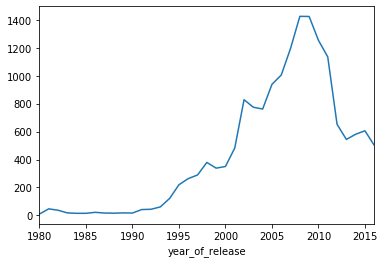

In [9]:
df.groupby('year_of_release')['name'].count().plot()


На графике видно, что до 1994 выпускалось незначительное количество игр. Поэтому считаем необходимым для последующего анализа ограничить датасет сроком 1994-2016 гг. <br>
Резкий рост выпуска игр начался в начале 2000. Пик выпуска игр пришёлся на 2008-2009 гг. 

In [10]:
# удалим значения до 1994 года
df = df[df['year_of_release'] >= 1994]

<a id="3.2"></a>
**Как менялись продажи по платформам? Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [11]:
df.groupby(['platform', 'year_of_release'])[['all_sales']].sum().head()

all_sales
platform year_of_release           
3DO      1994                  0.02
         1995                  0.08
3DS      2011                 63.20
         2012                 51.36
         2013                 56.57

<a id="3.3"></a>
Посмотрим на **10 самых популярных платформ** по продажам игр в 1994-2016 гг.

Text(0.5, 1.0, 'ТОП-10 самых популярных платформ')

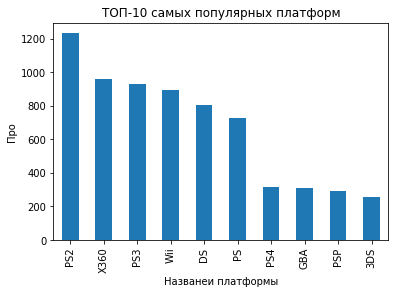

In [12]:
df.groupby(by='platform')['all_sales'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Названеи платформы')
plt.ylabel('Про')
plt.title('ТОП-10 самых популярных платформ')

Первые три строчки по продажам игр в 1994-2016 гг. занимают платформы, которые и сейчас у всех на слуху - PSP и X360. <br>
Выделим их в отдельный список.

In [13]:
platforms_top = df.groupby(by='platform')['all_sales'].sum().sort_values(ascending=False)[:10].index
platforms_top

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

**Посмотрим, как менялись продажи в разные годы у ТОП-10 платформ**

Text(0.5, 1, 'Как менялись продажи в разные годы у ТОП-10 платформ')

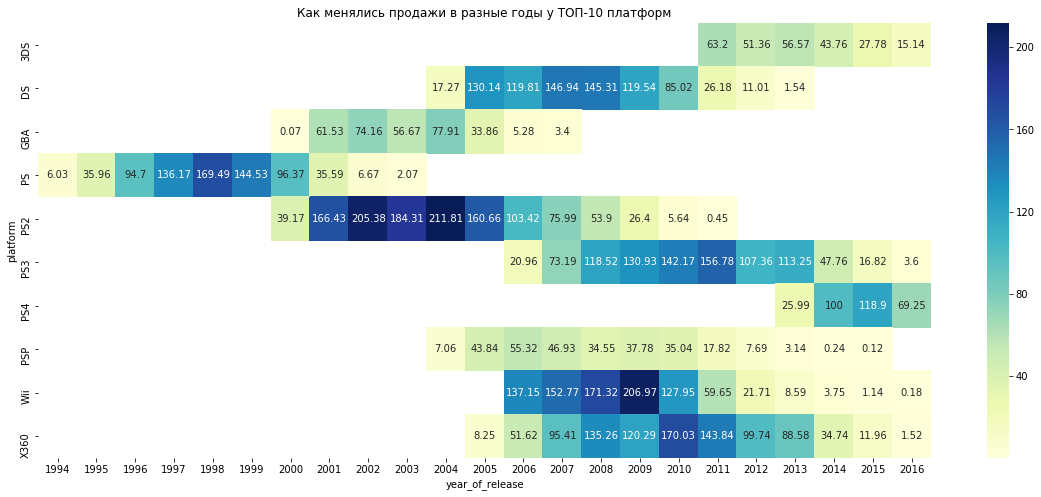

In [14]:
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(df.query('platform in @platforms_top')\
            .pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc = 'sum'),\
            cmap="YlGnBu", annot=True, fmt='g')
ax.set_title('Как менялись продажи в разные годы у ТОП-10 платформ')

In [15]:
# pivot = df.query('platform in @platforms_top').pivot_table(index='year_of_release', columns = 'platform', \
# values='all_sales', aggfunc='sum').plot(figsize=(10, 6), title='Как менялись продажи в разные годы у ТОП-10 платформ')
# plt.ylabel('Кол-во проданных копий (млн)')
# plt.xlabel('Год')
# plt.show()

#### За какой характерный срок появляются новые и исчезают старые платформы
На графике видно, что характерный срок жизни приставки - около 10 лет. Многие, например, ручные платформы "умерли", поскольку их заменили мобильные телефоны. Это также может быть связано с техническими характеристиками платформ, которые со временем устаревают.

#### Определяем актуальный период
За актуальный период примем срок 2012 - 2016 гг. Можно было взять с 2005 года, так как в этот период в основном появились платформы, которые живы до сих пор. Но мы выяснили, что срок жизни платформ - около 10 лет. Это значит, что в данные для анализа могли бы попасть платформы, которые вскоре умрут. <br>
Создадим новый датафрейм, в котором будет только актуальный период.

In [16]:
df1 = df.loc[df['year_of_release'] >= 2012]
df1.year_of_release.unique()

<IntegerArray>
[2013, 2015, 2012, 2014, 2016]
Length: 5, dtype: Int64

<a id="3.4"></a>
### Рейтинг за актуальный период

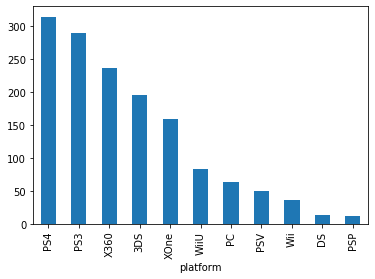

In [17]:
# Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
df1.groupby(by='platform')['all_sales'].sum().sort_values(ascending=False).plot(kind='bar')

За выбранный период 2012-2016 гг. по количеству проданных копий лидируют платформы PS4, PS3 и X360.

In [18]:
# df1.pivot_table(index='year_of_release', columns = 'platform', \
# values='all_sales', aggfunc='sum').plot(figsize=(10, 6), title='Как менялись продажи в разные годы (акт. период)', grid=True)
# plt.ylabel('Кол-во проданных копий (млн)')
# plt.xlabel('Год')
# plt.show()

### Как менялись продажи в разные годы (акт. период)

Text(0.5, 1, 'Как менялись продажи в разные годы (акт. период)')

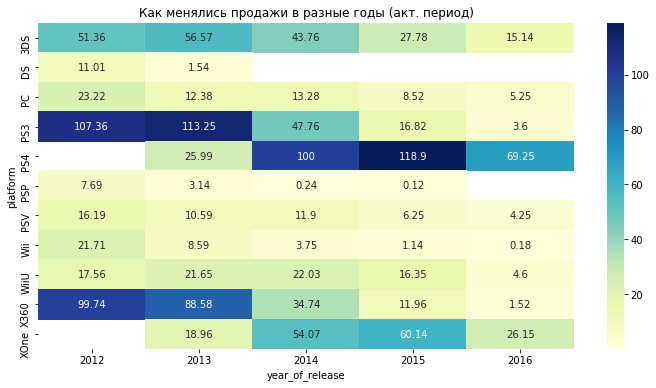

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df1.pivot_table(index='platform', columns='year_of_release', values='all_sales', aggfunc = 'sum'),\
            cmap='YlGnBu', annot=True, fmt='g')
ax.set_title('Как менялись продажи в разные годы (акт. период)')

На графике мы видим, что в 2016 лидерами по продажам являются:
1. PS4 (69 млн копий)
2. XONE (26 млн копий)
3. 3DS (15,4 млн копий)

Первые двое лидеров показывают снижение продаж с 2015 года. У 3DS продажи стабильно падают с 2013 года. Очевидного роста не показывает ни одна из платформ.

#### Диаграммы размаха по глобальным продажам игр в разбивке по платформам


(0, 2)

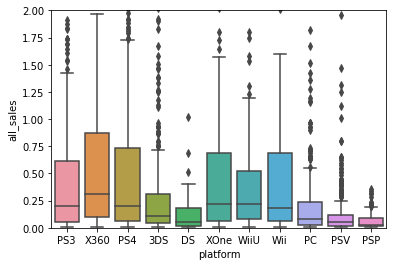

In [20]:
sns.boxplot(x="platform", y="all_sales", data=df1)
plt.ylim(0, 2)

В основном у лидеров продажи варьируются в диапазоне 0,2 - 0,25 млн проданных копий на одну выпущенную игру. Один из лидеров по продажам в 2016 году - 3DS в целом имеет довольно низкий медианный показатель в сравнении с другими.

<a id="3.5"></a>
#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для этого построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами. 

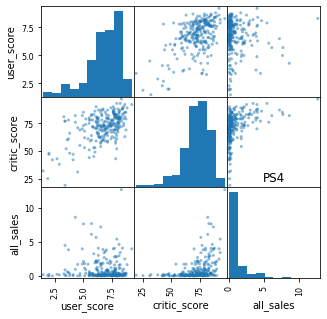

              user_score  critic_score  all_sales
user_score      1.000000      0.557654  -0.033625
critic_score    0.557654      1.000000   0.405895
all_sales      -0.033625      0.405895   1.000000


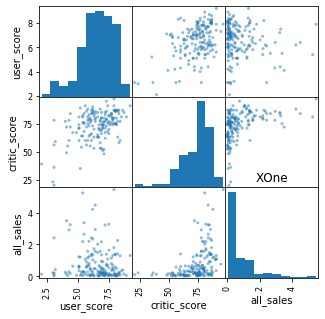

              user_score  critic_score  all_sales
user_score      1.000000      0.472462  -0.094003
critic_score    0.472462      1.000000   0.410422
all_sales      -0.094003      0.410422   1.000000


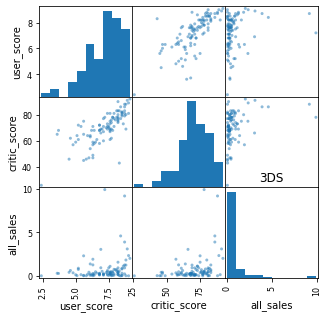

              user_score  critic_score  all_sales
user_score      1.000000      0.722762   0.201813
critic_score    0.722762      1.000000   0.310553
all_sales       0.201813      0.310553   1.000000


In [21]:
def get_corr_scatter(platform):
    df_corr = df1.query('platform == @platform')
    df_corr = df_corr[['user_score','critic_score','all_sales']]
    df_corr = df_corr.query('(user_score <= 10) and (critic_score <= 100)')

    #построим график по данным
    pd.plotting.scatter_matrix(df_corr,figsize=(5,5))
    plt.title(platform)
    plt.show()
    
    print(df_corr.corr())
    
for platform in ['PS4', 'XOne', '3DS']:
    get_corr_scatter(platform)




Диаграммы и корреляции показывают, что между продажами и оценками критиков зависимости почти нет. Если пользователи плохо оценили игру, это не значит, что она будет хуже продаваться - и наоборот. Оценка критиков имеет ненамного больше влияния.
Интересно и то, что не наблюдается сильной корреляции между оценками пользователей и критиков (только у Nintendo 3DS).

<a id="3.6"></a>
#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами

In [22]:
genre = df1.pivot_table(index='genre', values='all_sales', aggfunc={'sum', 'count'}).sort_values(by='sum', ascending=False)
genre['conversion'] = genre['sum'] / genre['count']
genre.columns = ["Выпущено игр", "Продано копий (млн)", "Кол-во проданных копий на 1 выпущенную игру (млн)"]
genre

,Выпущено игр,Продано копий (млн),Кол-во проданных копий на 1 выпущенную игру (млн)
genre,,,
Action,1031,441.12,0.427856
Shooter,235,304.73,1.296723
Role-Playing,370,192.80,0.521081
Sports,268,181.07,0.675634
Misc,192,85.04,0.442917
Platform,85,61.00,0.717647
Racing,115,53.50,0.465217
Fighting,109,44.49,0.408165
Simulation,80,35.12,0.439000


Самыми популярными по продажам жанрами являются:
1. Action
2. Shooter
3. Role-Playing

При этом по количеству выпущенных игр лидируют ТОП-3 выглядит немного иначе: 
1. Action
2. Role-Playing
3. Adventure

По количеству проданных копий на 1 выпущенную игру ТОП-3 выглядит так:
1. Shooter
2. Platform
3. Sports


<a id="3.7"></a>
### Вывод

На третьем этапе мы выделили характерный срок жизни приставки - около 10 лет. Многие, например, ручные платформы "умерли", поскольку их заменили мобильные телефоны. Это также может быть связано с техническими характеристиками платформ, которые со временем устаревают.

В частности на этом основании мы выделили актуальный период 2012 - 2016 гг, на основании анализа которого мы сможем сделать выводы для планирования рекламной кампании.

В актуальный период по числу проданных копий игр лидируют следующие платформы:
1. PS4
2. PS3
3. X360

При этом в последний отчетный год - 2016-й тройка лидеров по продажам во всем мире выглядит иначе:

1. PS4 (69 млн копий)
2. XONE (26 млн копий)
3. 3DS (15,4 млн копий)

Первые двое лидеров показывают снижение продаж с 2015 года. У 3DS продажи стабильно падают с 2013 года. Очевидного роста не показывает ни одна из платформ.

Самыми популярными по продажам **жанрами** являются:

1. Action
2. Shooter
3. Role-Playing

При этом по **количеству выпущенных игр** ТОП-3 выглядит немного иначе:

1. Action
2. Role-Playing
3. Adventure

По **количеству проданных копий на 1 выпущенную игру** ТОП-3 выглядит так:

1. Shooter
2. Platform
3. Sports

<a id="4"></a>
### Шаг 4. Портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):

<a id="4.1"></a>
* **Самые популярные платформы (топ-5)**

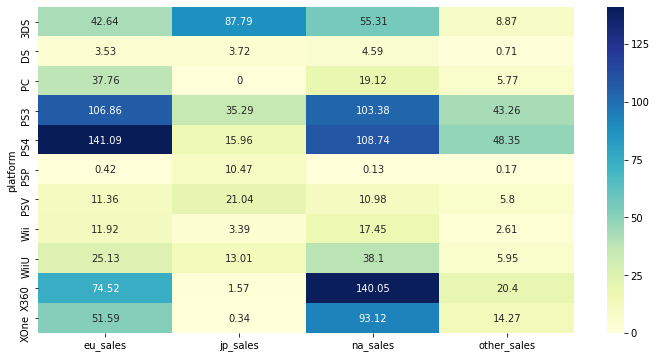

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df1.pivot_table(['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 'platform', aggfunc='sum'), cmap="YlGnBu", annot=True, fmt='g')

In [24]:
na_platform = df1.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)[:5]
na_platform['part'] = na_platform / na_platform.sum() * 100
na_platform

,na_sales,part
platform,,
X360,140.05,27.976428
PS4,108.74,21.721934
PS3,103.38,20.651219
XOne,93.12,18.601678
3DS,55.31,11.048742


Большую долю рынка по продажам игр в Северной Америке ожидаемо занимает X360 (27%) от производителя из США. За ним следуют приставки от японского производителя, но разных поколений - PS4 (22%) и PS3 (21%).

In [25]:
eu_platform = df1.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)[:5]
eu_platform['part'] = eu_platform / eu_platform.sum() * 100
eu_platform

,eu_sales,part
platform,,
PS4,141.09,33.858891
PS3,106.86,25.644348
X360,74.52,17.883369
XOne,51.59,12.380610
3DS,42.64,10.232781


В Европейском Союзе американская X360 опускается на третье место, а PS4 и PS3 занимают первое и второе места соответственно.

In [26]:
jp_platform = df1.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)[:5]
jp_platform['part'] = jp_platform / jp_platform.sum() * 100
jp_platform

,jp_sales,part
platform,,
3DS,87.79,50.719279
PS3,35.29,20.388237
PSV,21.04,12.155526
PS4,15.96,9.220637
WiiU,13.01,7.516321


В Японии первое место занимает свой производитель, но не тот же, что в ЕС - Nintendo 3 DS. Причём она взяла 50% рынка. Ни одна американская приставка в рейтинг не попала. 

In [27]:
other_platform = df1.pivot_table(index='platform', values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False)[:5]
other_platform['part'] = other_platform / other_platform.sum() * 100
other_platform

,other_sales,part
platform,,
PS4,48.35,35.775065
PS3,43.26,32.008879
X360,20.40,15.094340
XOne,14.27,10.558639
3DS,8.87,6.563078


В других странах первые два места занимают PS4 (36%) и PS3 (32%). На третьем и четвёртом американцы X360 и XOne (15% и 10%) соответственно.

<a id="4.2"></a>
* **Самые популярные жанры (топ-5). Поясните разницу.**

In [28]:
jp_genre = df1.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)[:5]
jp_genre['part'] = jp_genre / jp_genre.sum() * 100
jp_genre

,jp_sales,part
genre,,
Role-Playing,65.44,43.352103
Action,52.80,34.978470
Misc,12.86,8.519377
Simulation,10.41,6.896323
Fighting,9.44,6.253726


In [29]:
eu_genre = df1.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)[:5]
eu_genre['part'] = eu_genre / eu_genre.sum() * 100
eu_genre

,eu_sales,part
genre,,
Action,159.34,38.145169
Shooter,113.47,27.164129
Sports,69.09,16.539787
Role-Playing,48.53,11.617830
Racing,27.29,6.533084


In [30]:
na_genre = df1.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)[:5]
na_genre['part'] = na_genre / na_genre.sum() * 100
na_genre

,na_sales,part
genre,,
Action,177.84,35.123339
Shooter,144.77,28.592025
Sports,81.53,16.102147
Role-Playing,64.00,12.639978
Misc,38.19,7.542512


In [31]:
other_genre = df1.pivot_table(index='genre', values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False)[:5]
other_genre['part'] = other_genre / other_genre.sum() * 100
other_genre

,other_sales,part
genre,,
Action,51.14,38.353082
Shooter,37.26,27.943603
Sports,22.44,16.829159
Role-Playing,14.83,11.121944
Misc,7.67,5.752212


Во всех регионах, кроме Японии, первые три места (причем примерно с одной и той же долей) занимают игры следующих жанров:
1. Action
2. Shooter
3. Sports

В Японии рейтинг выглядит иначе. С другими регионами в нём совпадает только жанр Action. Четвёртое и пятое места в нём также занимают жанры, которые не представлены в ТОП-5 других регионов. (Simulation и Fighting)

1. Role-Playing
2. Action
3. Misc (Смешанный жанр)

<a id="4.3"></a>
* **Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

ESRB (Entertainment Software Rating Board)

* M (Mature) - рекомендуется к просмотру от 17 лет <br>
* E (Everyone) - рекомендуется к просмотру от 6 лет <br>
* E10+ (Everyone 10 and older) - рекомендуется к просмотру от 10 лет <br>
* T (Teen) - рекомендуется к просмотру от 13 лет <br>
* Z - рейтинг отсутствует

In [32]:
na_rating = df1.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_rating['part'] = na_rating / na_rating.sum() * 100
na_rating

,na_sales,part
rating,,
M,231.57,39.184730
E,114.37,19.352928
Z,103.31,17.481429
E10+,75.70,12.809449
T,66.02,11.171464


В Северной Америке лучше всего продаются игры для людей от 17 лет - они составляют 39 процентов от всех продаж. Второе место занимают игры для всех, а на третьем - с отсутствующей категорией (во всяком случае отсутствующей в наших данных). Наименее популярны игры для подростков.

In [33]:
eu_rating = df1.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_rating['part'] = eu_rating / eu_rating.sum() * 100
eu_rating

,eu_sales,part
rating,,
M,193.96,38.269997
E,113.03,22.301803
Z,91.50,18.053747
E10+,55.37,10.924983
T,52.96,10.449469


В Европейском Союзе тоже наиболее популярны игры для взрослых - и тоже они составляют около 40 процентов рынка. В целом рейтинг не отличается от североамериканского.

In [34]:
jp_rating = df1.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_rating['part'] = jp_rating / jp_rating.sum() * 100
jp_rating

,jp_sales,part
rating,,
Z,108.84,56.516772
E,28.33,14.710770
T,26.02,13.511268
M,21.20,11.008412
E10+,8.19,4.252778


В Японии большинство продаваемых игр имеют неизвестный возрастный рейтинг - 56%. Игры для взрослых, которые стоят на первом месте в остальных регионах, занимают здесь только четвёртую позицию - 11%. Не исключено, что если бы мы знали реальные значениях в пропусках, то рейтинг бы сильно не отличался от рейтинга других стран.

Скорее всего, отсутствие маркировки в данном случае связано с тем, что ESRB - американская организация, которая не ставит маркировки для игр, которые не выпускаются в Америке.

In [35]:
other_rating = df1.pivot_table(index='rating', values='other_sales', aggfunc='sum').sort_values(by='other_sales', ascending=False)
other_rating['part'] = other_rating / other_rating.sum() * 100
other_rating

,other_sales,part
rating,,
M,63.38,40.586578
E,31.44,20.133197
Z,27.17,17.398822
T,17.94,11.488217
E10+,16.23,10.393186


В остальных регионах рейтинг совпадает с СА и ЕС, кроме последних двух мест. Четвёртую и пятую позиции занимают игры для подростков (категория Т) и для всех от десяти (Е10+).

<a id="4.4"></a>
### Вывод

Мы составили портрет пользователей из Северной Америки, Европейского Союза, Японии и остальных. После анализа становится очевидным, что Япония отличается от других регионов по большинству параметров.

### Портрет Японии
В скобках - доля на рынке.

**ТОП-3 платформ по продажам**
1. 3DS (50%)
2. PS3 (20%)
3. PSV (12)

**ТОП-3 жанров по продажам**
1. Role-Playing (65%)
2. Action (53%)
3. Misc (Смешанный жанр) (13%)

**ТОП-3 возрастных категории по продажам**
1. Z - в нашем случае это неизвестная категория.
2. Е - игры для всех (от 6 лет)
3. Т - игры для подростков (от 13 лет)

### Портрет Северной Америки

**ТОП-3 платформ по продажам**
1. X360 (27%)
2. PS4 (22%)
3. PS3 (21%)

**ТОП-3 жанров по продажам**
1. Action (35%)
2. Shooter (29%)
3. Sports (16%)

**ТОП-3 возрастных категории по продажам**
1. M - игры для взрослых (от 17 лет)
2. Е - игры для всех (от 6 лет)
3. Z - в нашем случае это неизвестная категория

### Портрет Европейского Союза

**ТОП-3 платформ по продажам**
1. X360 (18%)
2. PS4 (34%)
3. PS3 (25%)

**ТОП-3 жанров по продажам**
1. Action (38%)
2. Shooter (27%)
3. Sports (16%)

**ТОП-3 возрастных категории по продажам**
1. M - игры для взрослых (от 17 лет)
2. Е - игры для всех (от 6 лет)
3. Z - в нашем случае это неизвестная категория


### Портрет других регионов

**ТОП-3 платформ по продажам**
1. PS4 (36%)
2. PS3 (32%)
3. X360(15%)

**ТОП-3 жанров по продажам**
1. Action (38%)
2. Shooter (28%)
3. Sports (17%)

**ТОП-3 возрастных категории по продажам**
1. M - игры для взрослых (от 17 лет)
2. Е - игры для всех (от 6 лет)
3. Z - в нашем случае это неизвестная категория

<a id="5"></a>
### Шаг 5. Проверка гипотезы

<a id="5.1"></a>
### 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**H0: Средние пользовательские рейтинги платформ Xbox One и PC равны**

**H1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются**

In [36]:
df_hypo = df1.query('user_score <= 10')
df_hypoXONE = df_hypo.loc[df['platform']=='XOne', 'user_score']
df_hypoPC = df_hypo.loc[df['platform']=='PC', 'user_score']



In [37]:
print(np.var(df_hypoXONE, ddof=1))
print(np.var(df_hypoPC, ddof=1))


1.9069968429360695
2.770443997158418


Дисперсии различаются. Проводим t-test.

In [38]:
alpha = 0.05

results = st.ttest_ind(
    df_hypoXONE,
    df_hypoPC,
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Соответственно, мы склоняемся к тому, что верна нулевая гипотеза. То есть:
**Средние пользовательские рейтинги платформ Xbox One и PC равны**

In [39]:
print('Средний пользовательский рейтинг игр на XBox One:', df_hypoXONE.mean())
print('Средний пользовательский рейтинг игр на PC:', df_hypoPC.mean())

Средний пользовательский рейтинг игр на XBox One: 6.521428571428572
Средний пользовательский рейтинг игр на PC: 6.4286407766990274


<a id="5.2"></a>
### 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**H0: Средние пользовательские рейтинги жанров Action и Sports равны**

**H1: Средние пользовательские рейтинги жанров Action и Sports отличаются**

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Гипотезы сформулированы верно.
        
</div>

In [40]:
df_hypoACTION = df_hypo.loc[df['genre']=='Action', 'user_score']
df_hypoSPORTS = df_hypo.loc[df['genre']=='Sports', 'user_score']

Проверим равенство дисперсий

In [41]:
print(np.var(df_hypoACTION, ddof=1))
print(np.var(df_hypoSPORTS, ddof=1))

1.8890840494348111
3.022890298704732


Дисперсии различаются. Проводим t-test.

In [42]:
alpha = 0.05

results = st.ttest_ind(
    df_hypoACTION,
    df_hypoSPORTS,
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


То есть средние пользовательские рейтинги жанров Action и Sports, вероятнее всего, отличаются.

In [43]:
print('Средний пользовательский рейтинг жанра Sports:', df_hypoSPORTS.mean())
print('Средний пользовательский рейтинг жанра Action:', df_hypoACTION.mean())

Средний пользовательский рейтинг жанра Sports: 5.455897435897437
Средний пользовательский рейтинг жанра Action: 6.825047801147227


<a id="6"></a>
### Общий вывод
Мы провели исследование и теперь можем назвать параметры, которые сказываются на успешности игры.

**Если говорить о факторах, которые влияют на популярность без привязки к регионам, то они выглядят так:**

В период 2012-2016 гг. по числу проданных копий игр лидируют следующие платформы:
1. PS4
2. PS3
3. X360

При этом в последний отчетный год - 2016-й тройка лидеров по продажам во всем мире выглядит иначе:

1. PS4 (69 млн копий)
2. XONE (26 млн копий)
3. 3DS (15,4 млн копий)

Впрочем, надо отметить, что первые двое лидеров показывают снижение продаж с 2015 года. У 3DS продажи стабильно падают с 2013 года. **Очевидного роста не показывает ни одна из платформ**.

Самыми популярными по продажам **жанрами** являются:

1. Action
2. Shooter
3. Role-Playing

При этом по **количеству выпущенных игр** ТОП-3 выглядит немного иначе:

1. Action
2. Role-Playing
3. Adventure

По **количеству проданных копий на 1 выпущенную игру** ТОП-3 выглядит так:

1. Shooter
2. Platform
3. Sports

Соответственно, можно сказать, что, скорее всего, в будущем лучше будет продаваться шутер для PS4.

Однако следует обратить внимание на особенности регионов, в которых мы планируем продавать игры и проводить кампанию исходя из этого. Скорее всего, в силу значительных культурных отличий, Япония отличается и по характеру потребления игр.

### Портрет Японии
В скобках - доля на рынке.

**ТОП-3 платформ по продажам**
1. 3DS (50%)
2. PS3 (20%)
3. PSV (12)

**ТОП-3 жанров по продажам**
1. Role-Playing (65%)
2. Action (53%)
3. Misc (Смешанный жанр) (13%)

**ТОП-3 возрастных категории по продажам**
1. Z - в нашем случае это неизвестная категория.
2. Е - игры для всех (от 6 лет)
3. Т - игры для подростков (от 13 лет)

### Портрет Северной Америки

**ТОП-3 платформ по продажам**
1. X360 (27%)
2. PS4 (22%)
3. PS3 (21%)

**ТОП-3 жанров по продажам**
1. Action (35%)
2. Shooter (29%)
3. Sports (16%)

**ТОП-3 возрастных категории по продажам**
1. M - игры для взрослых (от 17 лет)
2. Е - игры для всех (от 6 лет)
3. Z - в нашем случае это неизвестная категория

### Портрет Европейского Союза

**ТОП-3 платформ по продажам**
1. X360 (18%)
2. PS4 (34%)
3. PS3 (25%)

**ТОП-3 жанров по продажам**
1. Action (38%)
2. Shooter (27%)
3. Sports (16%)

**ТОП-3 возрастных категории по продажам**
1. M - игры для взрослых (от 17 лет)
2. Е - игры для всех (от 6 лет)
3. Z - в нашем случае это неизвестная категория


### Портрет других регионов

**ТОП-3 платформ по продажам**
1. PS4 (36%)
2. PS3 (32%)
3. X360(15%)

**ТОП-3 жанров по продажам**
1. Action (38%)
2. Shooter (28%)
3. Sports (17%)

**ТОП-3 возрастных категорий по продажам**
1. M - игры для взрослых (от 17 лет)
2. Е - игры для всех (от 6 лет)
3. Z - в нашем случае это неизвестная категория


In [44]:
print('Код проходит полностью за', datetime.datetime.now()-starttime)

Код проходит полностью за 0:00:09.624884
